<a href="https://colab.research.google.com/github/anushasanka33/Rainfall_Prediction/blob/main/Rainfall_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay, classification_report, auc, precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('rainfall_aus.csv')

In [ ]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736559,0.103938,0.466993,0.072586,0.177397,0.175049,0.175166,-0.232877,0.006082,-0.450954,-0.461280,0.078773,0.021557,0.901820,0.708918
MaxTemp,0.736559,1.000000,-0.074997,0.587932,0.470156,0.067591,0.014433,0.050285,-0.504103,-0.508860,-0.332044,-0.427154,-0.289353,-0.277944,0.887212,0.984505
Rainfall,0.103938,-0.074997,1.000000,-0.064351,-0.227549,0.133651,0.087330,0.057878,0.224414,0.255771,-0.168148,-0.126526,0.198541,0.172409,0.011187,-0.079662
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177397,0.067591,0.133651,0.203021,-0.034750,1.000000,0.605291,0.686302,-0.215049,-0.026293,-0.458712,-0.413717,0.071789,0.109144,0.150125,0.032726
WindSpeed9am,0.175049,0.014433,0.087330,0.193084,0.005499,0.605291,1.000000,0.519539,-0.270841,-0.031587,-0.228710,-0.175782,0.025156,0.054603,0.128525,0.004555
WindSpeed3pm,0.175166,0.050285,0.057878,0.129400,0.053834,0.686302,0.519539,1.000000,-0.145510,0.016468,-0.296319,-0.255404,0.053373,0.025397,0.163015,0.027760
Humidity9am,-0.232877,-0.504103,0.224414,-0.504092,-0.490819,-0.215049,-0.270841,-0.145510,1.000000,0.666965,0.139409,0.186832,0.452274,0.357379,-0.471340,-0.498399
Humidity3pm,0.006082,-0.508860,0.255771,-0.390243,-0.629130,-0.026293,-0.031587,0.016468,0.666965,1.000000,-0.027580,0.051963,0.517100,0.523125,-0.221024,-0.557838


In [ ]:
lengths=data["Date"].str.len()
lengths.value_counts()

10    145452
Name: Date, dtype: int64

In [ ]:
data['Date']=pd.to_datetime(data["Date"])
data['year']=data.Date.dt.year
def encode(data_set,col,max_val):
  data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
  data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)
  return data
data['month']=data.Date.dt.month
data=encode(data,'month',12)
data['day']=data.Date.dt.month
data=encode(data,'day',31)


In [ ]:
s=(data.dtypes=='object')
object_cols=list(s[s].index)
print("categorical variables:")
print(object_cols)

categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,classification_report, confusion_matrix
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras import callbacks
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [ ]:
label_encoder=LabelEncoder()
for i in object_cols:
    data[i]=label_encoder.fit_transform(data[i])

In [ ]:
features=data.drop(['RainTomorrow','Date','day','month'],axis=1)
target=data['RainTomorrow']
col_names=list(features.columns)
s_scaler=preprocessing.StandardScaler()
features=s_scaler.fit_transform(features)
features=pd.DataFrame(features,columns=col_names)



In [ ]:
features["RainTomorrow"]=target
features=features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features=features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features=features[(features["Rainfall"]<4.5)]
features=features[(features["Evaporation"]<2.8)]
features=features[(features["Sunshine"]<2.1)]
features=features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features=features[(features["WindSpeed9am"]<4)]
features=features[(features["WindSpeed3pm"]<2.5)]
features=features[(features["Humidity9am"]>-3)]
features=features[(features["Humidity3pm"]>-2.2)]
features=features[(features["Pressure9am"]<2)&(features["Pressure9am"]>-2.7)]
features=features[(features["Pressure3pm"]<2)&(features["Pressure3pm"]>-2.7)]
features=features[(features["Cloud9am"]<1.8)]
features=features[(features["Cloud3pm"]<2)]
features=features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features=features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]
features.shape

(52851, 27)

In [ ]:
x=features.drop(["RainTomorrow"],axis=1)
y=features["RainTomorrow"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=325)
print("shape of the training data:",x_train.shape)
print("shape of the testing data:",x_test.shape)
x.shape

shape of the training data: (42280, 26)
shape of the testing data: (10571, 26)


(52851, 26)

In [ ]:
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

In [ ]:
model=Sequential()
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=26)),
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu')),
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu')),
model.add(Dropout(0.25)),
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(units=1,kernel_initializer='uniform',activation='relu')),


(None,)

TRAINING OF THE MODEL

In [ ]:
opt=Adam(learning_rate=0.00009),
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy'),
history=model.fit(x_train,y_train,batch_size=16,epochs=3,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/3
2114/2114 [==============================] - 8s 3ms/step - loss: 0.3947 - accuracy: 0.8408 - val_loss: 0.3650 - val_accuracy: 0.8373
Epoch 2/3
2114/2114 [==============================] - 5s 2ms/step - loss: 0.3936 - accuracy: 0.8382 - val_loss: 0.3973 - val_accuracy: 0.7998
Epoch 3/3
2114/2114 [==============================] - 5s 2ms/step - loss: 0.3952 - accuracy: 0.8308 - val_loss: 0.3932 - val_accuracy: 0.8464


In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

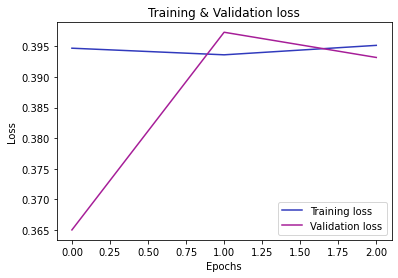

In [ ]:
df=pd.DataFrame(history.history)
plt.plot(df.loc[:,['loss']],"#313abd",label='Training loss')
plt.plot(df.loc[:,['val_loss']],"#a61e98",label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

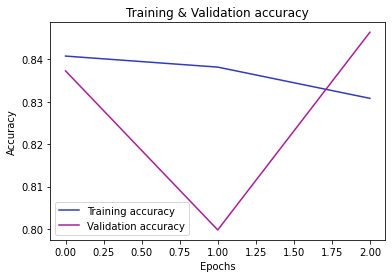

In [ ]:
df=pd.DataFrame(history.history)
plt.plot(df.loc[:,['accuracy']],"#313abd",label='Training accuracy')
plt.plot(df.loc[:,['val_accuracy']],"#a61e98",label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8289
           1       0.76      0.46      0.58      2260
           2       0.00      0.00      0.00        22

    accuracy                           0.85     10571
   macro avg       0.54      0.47      0.50     10571
weighted avg       0.84      0.85      0.84     10571

